##**Importing Libraries**


In [1]:
#For Data manipulation
import pandas as pd
import numpy as np
#For Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
# data splitting
from sklearn.model_selection import train_test_split
# Data modeling
from sklearn.linear_model import LogisticRegression # logistic Regression
# Other 5
from sklearn.naive_bayes import GaussianNB          # For Naive
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.tree import DecisionTreeClassifier     # Decision Tree
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.svm import SVC                         # SVM
# For Comparison among
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'seaborn'

## **EDA (Exploring Data Analysis)**

In [ ]:
# data importing
df = pd.read_csv('Heart_Disease_Prediction.csv')

Analyzing Data

In [ ]:
df.head(7)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,Presence
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,Absence
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,Presence
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,Absence
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,Absence
5,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,Absence
6,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,Presence


In [ ]:
df.shape

(1000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   float64
 1   Sex                      1000 non-null   float64
 2   Chest pain type          1000 non-null   float64
 3   BP                       1000 non-null   float64
 4   Cholesterol              1000 non-null   float64
 5   FBS over 120             1000 non-null   float64
 6   EKG results              1000 non-null   float64
 7   Max HR                   1000 non-null   float64
 8   Exercise angina          1000 non-null   float64
 9   ST depression            1000 non-null   float64
 10  Slope of ST              1000 non-null   float64
 11  Number of vessels fluro  1000 non-null   float64
 12  Thallium                 1000 non-null   float64
 13  Heart Disease            1000 non-null   object 
dtypes: float64(13), object(1)

In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.770410,0.663015,3.152231,131.821333,251.042567,0.157421,1.026859,149.856001,0.322017,1.026934,1.594246,0.673475,4.685043
std,9.184991,0.473313,0.957064,17.234062,51.318562,0.364011,0.997471,23.260275,0.467322,1.100357,0.612492,0.946813,1.938242
min,29.000000,-0.027481,0.932097,93.159796,126.000000,-0.022190,-0.058022,70.527642,-0.026348,0.000000,0.968312,-0.049602,2.884600
25%,48.000000,0.002951,2.972860,120.000000,213.000000,-0.000797,0.000000,135.972649,0.000000,0.013088,1.000000,0.000000,3.000000
50%,55.848670,0.996422,3.017505,130.000000,245.736391,0.000000,1.963926,154.078847,0.003882,0.800000,1.983210,0.014517,3.038095
75%,61.771746,1.000000,4.000000,140.118766,281.355072,0.007814,2.000000,165.761495,0.994917,1.600000,2.000000,1.006888,6.996015
max,77.000000,1.027892,4.079798,200.000000,564.000000,1.014070,2.057837,202.000000,1.026913,6.200000,3.027020,3.031607,7.092215


In [ ]:
df.isnull().sum()


,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [ ]:
df['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

In [ ]:
# Modifying Data
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

In [30]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70.000000,1,4.000000,130.000000,322.000000,0.000000,2.000000,109.000000,0.000000,2.400000,2.000000,3.000000,3.000000,1
1,67.000000,0,3.000000,115.000000,564.000000,0.000000,2.000000,160.000000,0.000000,1.600000,2.000000,0.000000,7.000000,0
2,57.000000,1,2.000000,124.000000,261.000000,0.000000,0.000000,141.000000,0.000000,0.300000,1.000000,0.000000,7.000000,1
3,64.000000,1,4.000000,128.000000,263.000000,0.000000,0.000000,105.000000,1.000000,0.200000,2.000000,1.000000,7.000000,0
4,74.000000,0,2.000000,120.000000,269.000000,0.000000,2.000000,121.000000,1.000000,0.200000,1.000000,1.000000,3.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,61.916209,0,3.968112,150.408495,245.929031,0.014651,0.011116,153.545786,0.987947,1.414950,1.994218,-0.022458,3.001700,1
996,53.686186,0,1.988509,132.893964,288.393127,1.006735,1.993852,159.142229,1.008521,0.002538,0.992132,0.984007,2.948072,0
997,65.315972,1,4.007990,119.401237,178.156400,0.002977,-0.014008,140.636507,-0.007322,0.395340,1.003036,-0.001556,6.995847,0
998,47.007028,1,3.982057,112.058637,204.242811,0.007041,0.000457,142.642563,-0.008324,0.066943,0.992856,-0.035117,2.969463,0


In [ ]:
df['Heart Disease'].value_counts()

,count
Heart Disease,
0,563
1,437


##**Data Ananlysis**

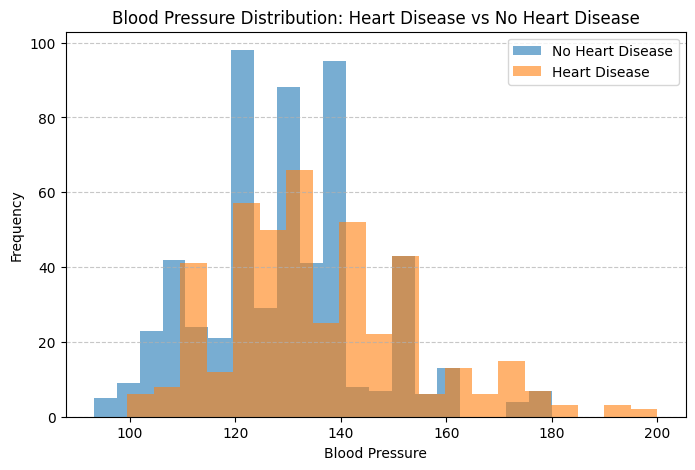

In [ ]:
# Finding relation : BP with Heart Disease
bp_absence = df[df['Heart Disease'] == 0]['BP']
bp_presence = df[df['Heart Disease'] == 1]['BP']
# Plot histogram comparison
plt.figure(figsize=(8,5))

plt.hist(bp_absence, bins=20, alpha=0.6, label='No Heart Disease')
plt.hist(bp_presence, bins=20, alpha=0.6, label='Heart Disease')

plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.title('Blood Pressure Distribution: Heart Disease vs No Heart Disease')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

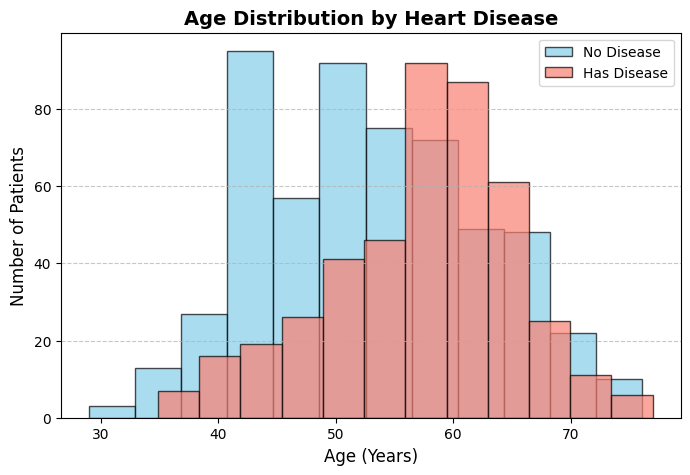

In [ ]:
# Relating Age and Disease
no_disease = df[df['Heart Disease'] == 0]
has_disease = df[df['Heart Disease'] == 1]

# Plot
plt.figure(figsize=(8, 5))
plt.hist(no_disease['Age'], bins=12, alpha=0.7, color='skyblue', label='No Disease', edgecolor='black')
plt.hist(has_disease['Age'], bins=12, alpha=0.7, color='salmon', label='Has Disease', edgecolor='black')

plt.title('Age Distribution by Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

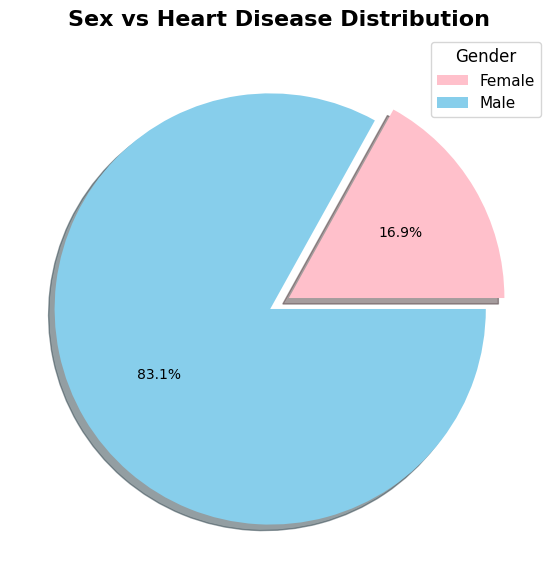

In [ ]:
df['Sex'] = df['Sex'].round().astype(int)
# Count how many males and females have heart disease
sex_counts = df.groupby('Sex')['Heart Disease'].sum()

labels = ['Female', 'Male']
colors = ['pink', 'skyblue']

plt.figure(figsize=(7, 7))
plt.pie(
    sex_counts,
    autopct='%1.1f%%',
    colors=colors,
    explode=(0.05, 0.05),
    shadow=True
)

plt.title('Sex vs Heart Disease Distribution', fontsize=16, fontweight='bold')

plt.legend(labels, loc='upper right', title='Gender', title_fontsize=12, fontsize=11)
plt.show()

##**Preparing data for Model**

In [ ]:
X = df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state =0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##**Training data**

In [ ]:
lr = LogisticRegression()                      # Creating Object
lr.fit(X_train, y_train)                       # Training Model
lr_pred = lr.predict(X_test)                   # Predicting through Model
lr_acc_score = accuracy_score(y_test, lr_pred) # Accuracy Score calculation
cm = confusion_matrix(y_test, lr_pred)         # Confusion Matrix

print("\nLogistic Regression")
print(cm)
print("Accuracy:", accuracy_score(y_test, lr_pred)*100)
print(classification_report(y_test, lr_pred))


Logistic Regression
[[100   7]
 [ 19  74]]
Accuracy: 87.0
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       107
           1       0.91      0.80      0.85        93

    accuracy                           0.87       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc_score = accuracy_score(y_test, nb_pred)


print("\n Naive Bayes ")
print(confusion_matrix(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred)*100)
print(classification_report(y_test, nb_pred))



 Naive Bayes 
[[101   6]
 [ 22  71]]
Accuracy: 86.0
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       107
           1       0.92      0.76      0.84        93

    accuracy                           0.86       200
   macro avg       0.87      0.85      0.86       200
weighted avg       0.87      0.86      0.86       200



In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_pred)

print("\n Random Forest ")
print(confusion_matrix(y_test, rf_pred))
print("Accuracy:", rf_acc_score*100)
print(classification_report(y_test, rf_pred))


 Random Forest 
[[102   5]
 [ 14  79]]
Accuracy: 90.5
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       107
           1       0.94      0.85      0.89        93

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



In [ ]:
dt = DecisionTreeClassifier(max_depth=6, random_state=0)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc_score = accuracy_score(y_test, dt_pred)

print("\n Decision Tree ")
print(confusion_matrix(y_test, dt_pred))
print("Accuracy:", dt_acc_score*100)
print(classification_report(y_test, dt_pred))


 Decision Tree 
[[97 10]
 [11 82]]
Accuracy: 89.5
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       107
           1       0.89      0.88      0.89        93

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.90      0.89       200



In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc_score = accuracy_score(y_test, knn_pred)

print("\n KNN ")
print(confusion_matrix(y_test, knn_pred))
print("Accuracy:", knn_acc_score*100)
print(classification_report(y_test, knn_pred))


 KNN 
[[104   3]
 [ 17  76]]
Accuracy: 90.0
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       107
           1       0.96      0.82      0.88        93

    accuracy                           0.90       200
   macro avg       0.91      0.89      0.90       200
weighted avg       0.91      0.90      0.90       200



In [ ]:
svc = SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc_score = accuracy_score(y_test, svc_pred)
svc_cm = confusion_matrix(y_test, svc_pred)

print("\n SVM ")
print(svc_cm)
print("Accuracy:", svc_acc_score*100)
print(classification_report(y_test, svc_pred))


 SVM 
[[107   0]
 [  4  89]]
Accuracy: 98.0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.96      0.98        93

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,87.0
1,Naive Bayes,86.0
2,Random Forest,90.5
3,K-Nearest Neighbour,90.0
4,Decision Tree,89.5
5,Support Vector Machine,98.0


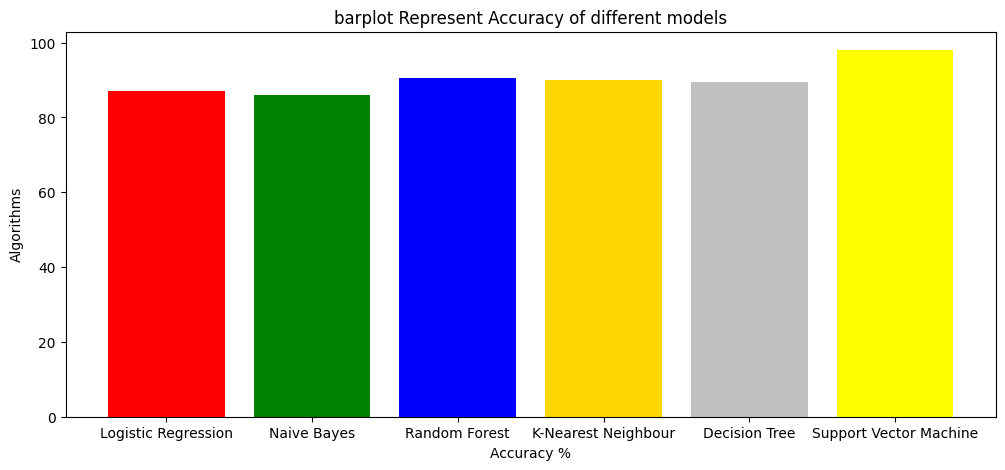

In [ ]:
# comparing different Moddel
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

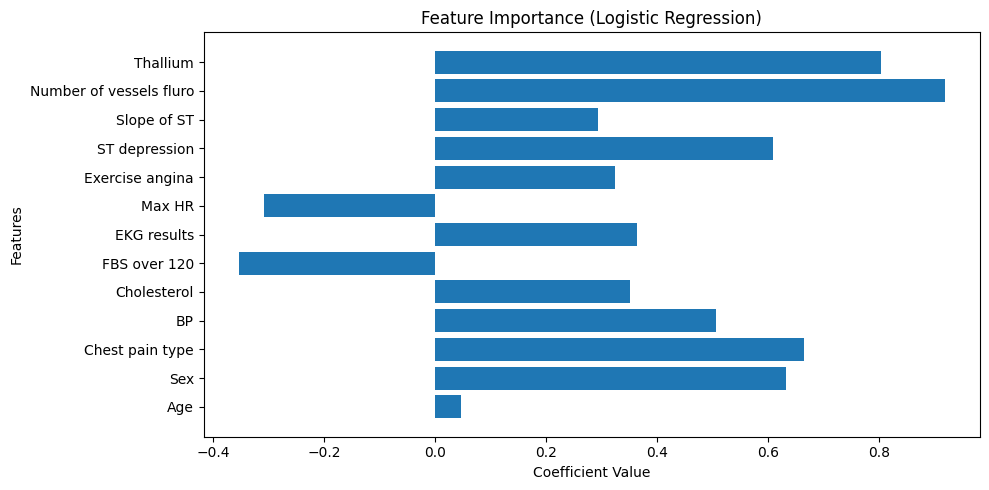

In [ ]:
# Extract logistic regression coefficients
importance = lr.coef_[0]   # coefficients for each feature

# Create DataFrame of features + their importance
log_reg_importance = pd.DataFrame({
    'Feature': df.columns[:-1],     # all columns except target
    'Importance': importance
})

# Plot the feature importance
plt.figure(figsize=(10,5))
plt.barh(log_reg_importance['Feature'], log_reg_importance['Importance'])
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


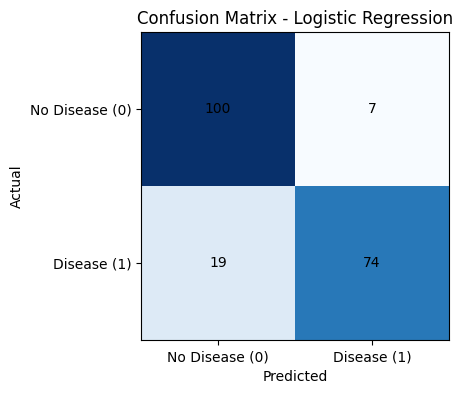

In [ ]:
plt.figure(figsize=(6,4))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")

# Add labels
classes = ['No Disease (0)', 'Disease (1)']

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Write numbers inside the boxes
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha='center', va='center',
                 color='black')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

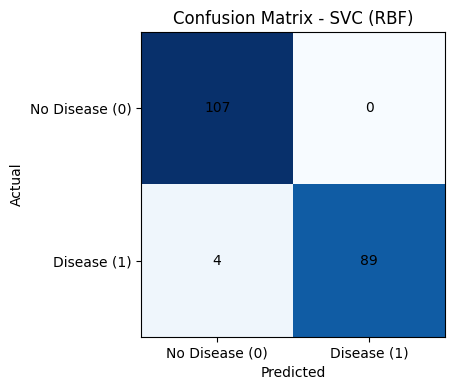

In [ ]:
plt.figure(figsize=(6,4))
plt.imshow(svc_cm, cmap='Blues')
plt.title("Confusion Matrix - SVC (RBF)")

classes = ['No Disease (0)', 'Disease (1)']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Center numbers inside boxes
for i in range(svc_cm.shape[0]):
    for j in range(svc_cm.shape[1]):
        plt.text(j, i, svc_cm[i, j],
                 ha='center', va='center',
                 color='black')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()